In [47]:
!pip show astropy

Name: astropy
Version: 5.0.2
Summary: Astronomy and astrophysics core library
Home-page: http://astropy.org
Author: The Astropy Developers
Author-email: astropy.team@gmail.com
License: BSD 3-Clause License
Location: /usr/lib/python3/dist-packages
Requires: 
Required-by: 


In [48]:
# Import the package
import astropy

# Check the installed version
print(astropy.__version__)

5.0.2


['Name', 'RA', 'DEC', 'HST_WFC3_F225W', 'HST_WFC3_F275W', 'HST_WFC3_F336W', 'HST_WFC3_F475W', 'HST_WFC3_F814W', 'HST_WFC3_F110W', 'HST_WFC3_F160W', 'Av_Best', 'Av_Exp', 'Av_p16', 'Av_p50', 'Av_p84', 'Rv_Best', 'Rv_Exp', 'Rv_p16', 'Rv_p50', 'Rv_p84', 'Rv_A_Best', 'Rv_A_Exp', 'Rv_A_p16', 'Rv_A_p50', 'Rv_A_p84', 'f_A_Best', 'f_A_Exp', 'f_A_p16', 'f_A_p50', 'f_A_p84', 'distance_Best', 'distance_Exp', 'distance_p16', 'distance_p50', 'distance_p84', 'radius_Best', 'radius_Exp', 'radius_p16', 'radius_p50', 'radius_p84', 'logL_Best', 'logL_Exp', 'logL_p16', 'logL_p50', 'logL_p84', 'logg_Best', 'logg_Exp', 'logg_p16', 'logg_p50', 'logg_p84', 'mbolmag_Best', 'mbolmag_Exp', 'mbolmag_p16', 'mbolmag_p50', 'mbolmag_p84', 'logA_Best', 'logA_Exp', 'logA_p16', 'logA_p50', 'logA_p84', 'logT_Best', 'logT_Exp', 'logT_p16', 'logT_p50', 'logT_p84', 'M_ini_Best', 'M_ini_Exp', 'M_ini_p16', 'M_ini_p50', 'M_ini_p84', 'M_act_Best', 'M_act_Exp', 'M_act_p16', 'M_act_p50', 'M_act_p84', 'Z_Best', 'Z_Exp', 'Z_p16', '

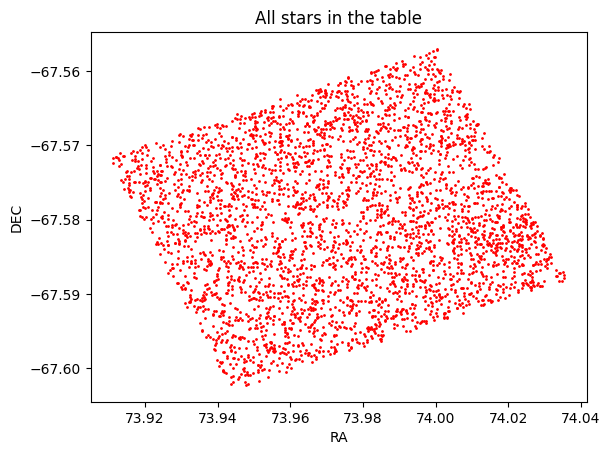

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
from astropy.visualization import make_lupton_rgb
from astropy import units as u
plt.ion()
import os

hdul = fits.open('hst_results_nd.fits')


hdr = hdul[0].header
wcs = WCS(hdr)
data = hdul[0].data

t = Table.read('hst_results_nd.fits')

# check all stars in the table which are the first row of the table
ra = t[0]['RA']
dec = t[0]['DEC']
age = t["logA_p50"]
mass = t["M_ini_p50"]
f475W = t["F475W_VEGA"]
f814W = t["F814W_VEGA"]
columns = t[0].colnames
print(columns)


# plot the table of all stars
plt.figure()
plt.plot(t['RA'], t['DEC'], 'o')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('All stars in the table')
plt.savefig('all_stars_table.png', dpi=300, bbox_inches='tight')
plt.show()


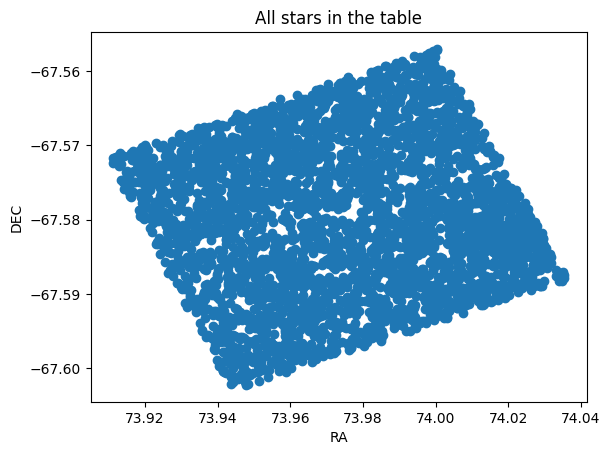

In [52]:
# plot the start with smaller red spots so that they can be distinguished
plt.figure()
plt.plot(t['RA'], t['DEC'], 'ro', ls= 'None', markersize = 1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('All stars in the table')
plt.savefig('all_stars.png')
plt.show()


In [53]:
# plot yound and old stars
young_stars = t[age < 8.5]
old_stars = t[age > 10]
print(len(young_stars))
print(len(old_stars))

44
170


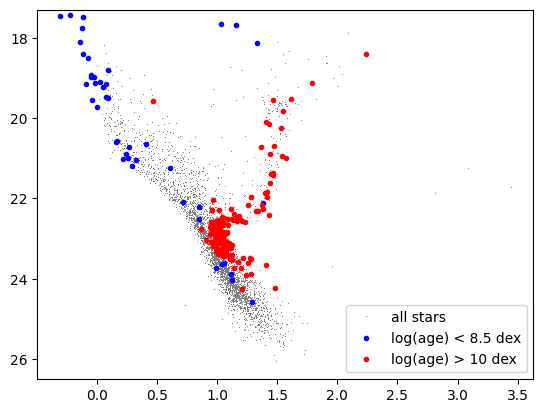

In [54]:
#print(old_stars [0:100])
plt.figure()
plt.plot(f475W - f814W, f475W, ',', color='gray', ls='', label='all stars')
plt.plot(young_stars["F475W_VEGA"] - young_stars["F814W_VEGA"], young_stars["F475W_VEGA"], 'b.', ls='', label='log(age) < 8.5 dex')
plt.plot(old_stars["F475W_VEGA"] - old_stars["F814W_VEGA"], old_stars["F475W_VEGA"], 'r.', ls='', label='log(age) > 10 dex')
plt.ylim(26.5, 17.3)
plt.legend()
plt.savefig('yound_vs_old.png', dpi=300, bbox_inches='tight')
plt.show()

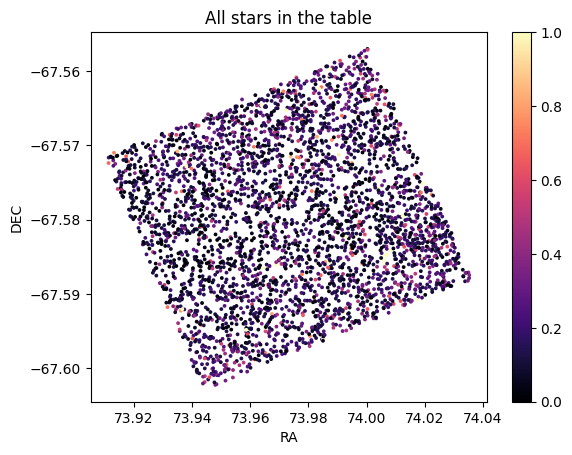

In [55]:
# use 'Av_p50' to plot the color of the stars
plt.figure()
plt.scatter(t['RA'], t['DEC'], s=3, c = t['Av_p50'], cmap = 'magma', vmin=0, vmax=1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('All stars in the table')
plt.colorbar()
plt.savefig('lmc_av_spacial.png')
plt.show()


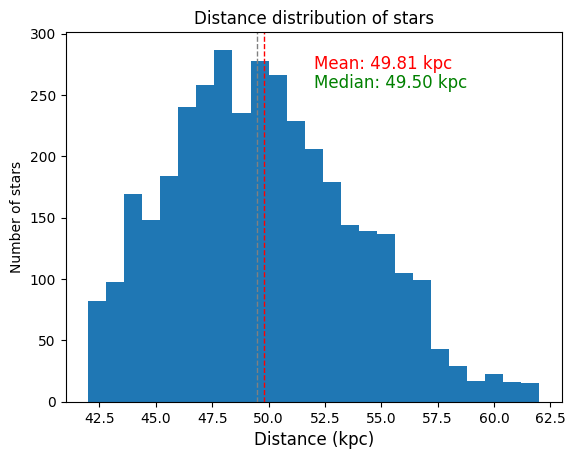

In [56]:
dist=t['distance_p50']
plt.figure()
plt.hist(dist/1000, bins=25)
plt.xlabel('Distance (kpc)', fontsize=12)
plt.ylabel('Number of stars')
plt.title('Distance distribution of stars')
d_mean = np.mean(dist)
d_median = np.median(dist)
d_std = np.std(dist)
plt.axvline(d_mean/1000, color='r', linestyle='dashed', linewidth=1)
plt.axvline(d_median/1000, color='gray', linestyle='dashed', linewidth=1)
plt.text(0.5, 0.9, 'Mean: {:.2f} kpc'.format(d_mean/1000), color='r', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.5, 0.85, 'Median: {:.2f} kpc'.format(d_median/1000), color='g', fontsize=12, transform=plt.gca().transAxes)
plt.savefig('lmc_hist_dist.png')
plt.show()


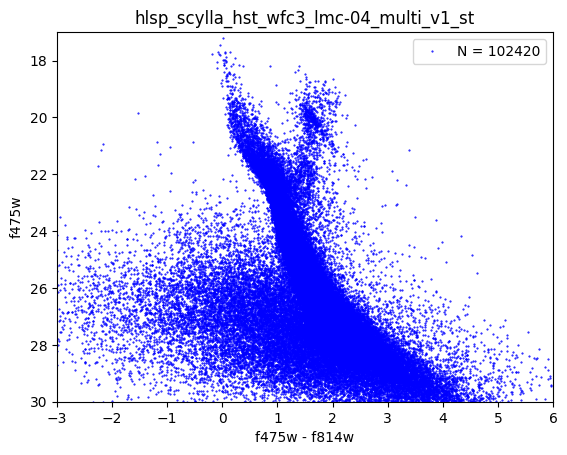

In [58]:



cat = Table.read('hlsp_scylla_hst_wfc3_lmc-04_multi_v1_st.fits')

f475 = cat["F475W_VEGA"]
f814 = cat["F814W_VEGA"]
n = len(f475)


col = f475 - f814
mag = f475

plt.figure()
plt.plot(col, mag, '.b', ls= 'None', markersize = 1, label='N = %s' % n)
plt.legend()
plt.xlabel('f475w - f814w')
plt.ylabel('f475w')
plt.title('hlsp_scylla_hst_wfc3_lmc-04_multi_v1_st')
plt.xlim(-3,6)
plt.ylim(30,17)
plt.savefig('lmc_color_f475.png')
plt.show()